In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
#读取原始数据
Obesity = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [27]:
#将双字符串变量转化为0-1变量，将因变量转化为1-7
Obesity.loc[Obesity['Gender'] == 'Female','Gender'] = 0
Obesity.loc[Obesity['Gender'] == 'Male','Gender'] = 1
Obesity.loc[Obesity['family_history_with_overweight'] == 'yes','family_history_with_overweight'] = 1
Obesity.loc[Obesity['family_history_with_overweight'] == 'no','family_history_with_overweight'] = 0
Obesity.loc[Obesity['FAVC'] == 'yes','FAVC'] = 1
Obesity.loc[Obesity['FAVC'] == 'no','FAVC'] = 0
Obesity.loc[Obesity['SMOKE'] == 'yes','SMOKE'] = 1
Obesity.loc[Obesity['SMOKE'] == 'no','SMOKE'] = 0
Obesity.loc[Obesity['SCC'] == 'yes','SCC'] = 1
Obesity.loc[Obesity['SCC'] == 'no','SCC'] = 0
Obesity.loc[Obesity['NObeyesdad'] == 'Insufficient_Weight','NObeyesdad'] = 1
Obesity.loc[Obesity['NObeyesdad'] == 'Normal_Weight','NObeyesdad'] = 2
Obesity.loc[Obesity['NObeyesdad'] == 'Overweight_Level_I','NObeyesdad'] = 3
Obesity.loc[Obesity['NObeyesdad'] == 'Overweight_Level_II','NObeyesdad'] = 4
Obesity.loc[Obesity['NObeyesdad'] == 'Obesity_Type_I','NObeyesdad'] = 5
Obesity.loc[Obesity['NObeyesdad'] == 'Obesity_Type_II','NObeyesdad'] = 6
Obesity.loc[Obesity['NObeyesdad'] == 'Obesity_Type_III','NObeyesdad'] = 7
Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,2
1,0,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,2
3,1,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,3
4,1,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,4


In [28]:
#将多字符串变量转化为虚拟变量
Obesity_CAEC = pd.get_dummies(Obesity['CAEC'])
Obesity_CAEC.columns = ['CAEC_Always','CAEC_Frequently','CAEC_Sometimes','CAEC_no']
Obesity_CALC = pd.get_dummies(Obesity['CALC'])
Obesity_CALC.columns = ['CALC_Always','CALC_Frequently','CALC_Sometimes','CALC_no']
Obesity_MTRANS = pd.get_dummies(Obesity['MTRANS'])
Obesity_MTRANS.columns = ['MTRANS_Automobile','MTRANS_Bike','MTRANS_Motorbike','MTRANS_Public_Transportation','MTRANS_Walking']

In [29]:
#将转化后的变量重新组合
Obesity1 = Obesity.drop(columns=['CAEC','CALC','MTRANS','NObeyesdad'])
Obesity1 = pd.concat([Obesity1,Obesity_CAEC,Obesity_CALC,Obesity_MTRANS,Obesity['NObeyesdad']],axis=1)
Obesity1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,0,0,1,0,0,0,1,0,2
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,0,1,0,0,0,0,1,0,2
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,1,0,0,0,0,0,1,0,2
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,1,0,0,0,0,0,0,1,3
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,0,1,0,0,0,0,1,0,4


## 描述性统计

In [30]:
#查看所有列的标签
columns = Obesity1.columns
print(columns)
print(len(columns))

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad'],
      dtype='object')
27


### 中心位置（均值、中位数、众数）

In [31]:
#计算均值
Mean =[]
for column in columns:
    Mean.append(np.mean(Obesity1[str(column)]))
    
#计算中位数
Median = []
for column in columns:
    Median.append(np.median(Obesity1[str(column)]))
    
#计算众数
from scipy.stats import mode
Mode = []
for column in columns:
    Mode.append(mode(Obesity1[str(column)]))

In [32]:
 #合并列表并输出结果
centre = pd.DataFrame({'variables':columns,'mean':Mean,'median':Median,'mode':Mode})
centre

,variables,mean,median,mode
0,Gender,0.505921,1.000000,"([1], [1068])"
1,Age,24.312600,22.777890,"([18.0], [128])"
2,Height,1.701677,1.700499,"([1.7], [60])"
3,Weight,86.586058,83.000000,"([80.0], [59])"
4,family_history_with_overweight,0.817622,1.000000,"([1], [1726])"
5,FAVC,0.883941,1.000000,"([1], [1866])"
6,FCVC,2.419043,2.385502,"([3.0], [652])"
7,NCP,2.685628,3.000000,"([3.0], [1203])"
8,SMOKE,0.020843,0.000000,"([0], [2067])"
9,CH2O,2.008011,2.000000,"([2.0], [448])"


<ipython-input-35-168846991ff4>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


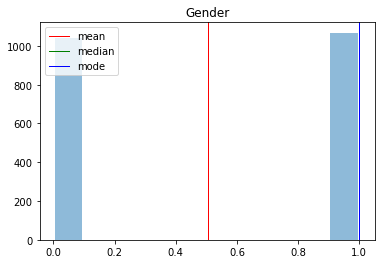

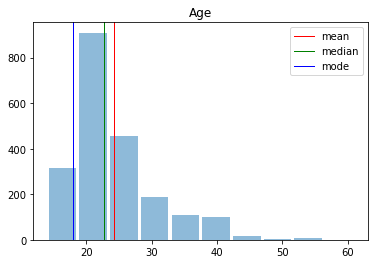

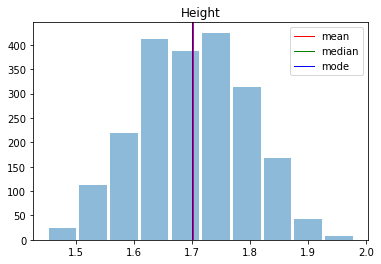

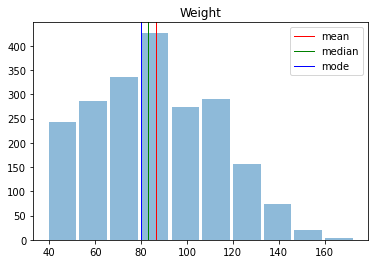

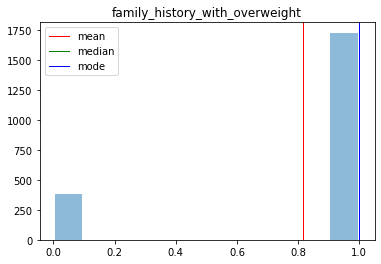

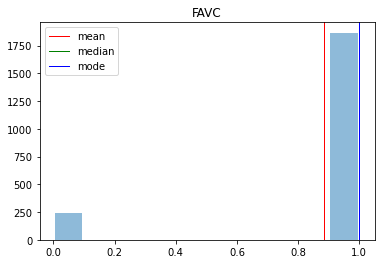

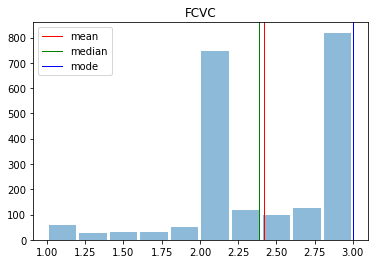

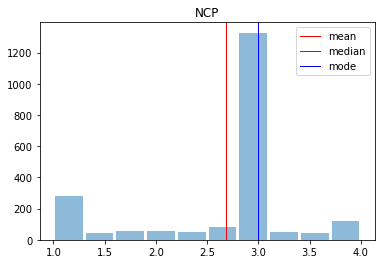

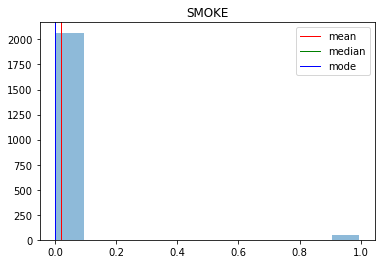

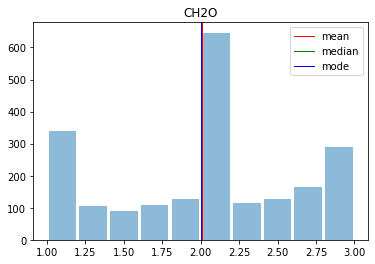

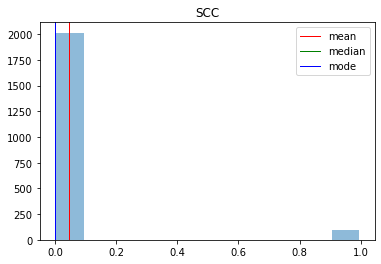

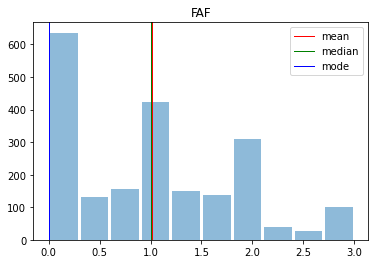

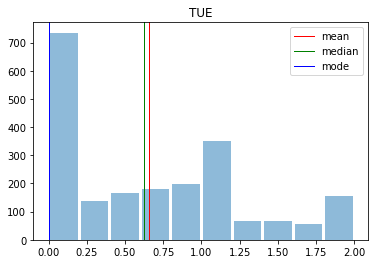

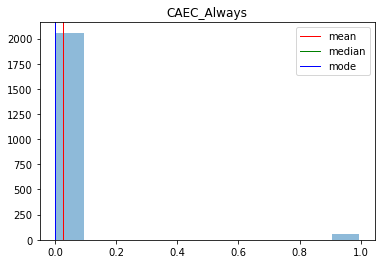

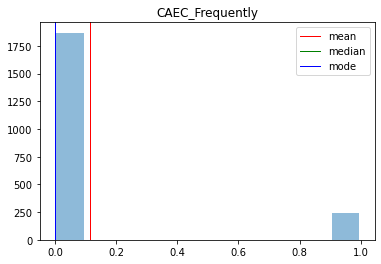

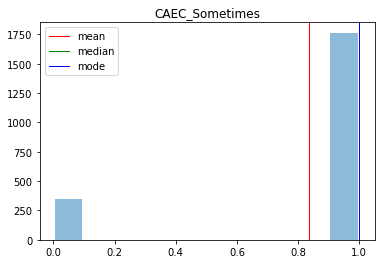

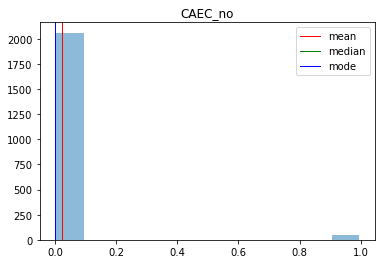

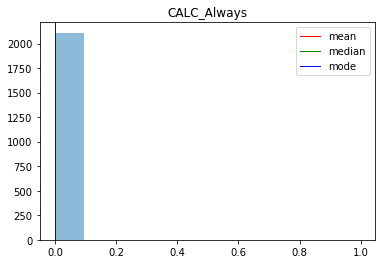

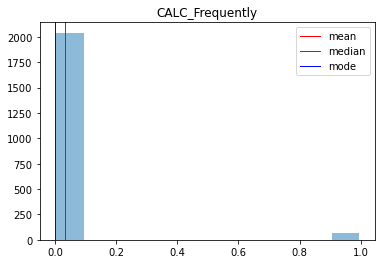

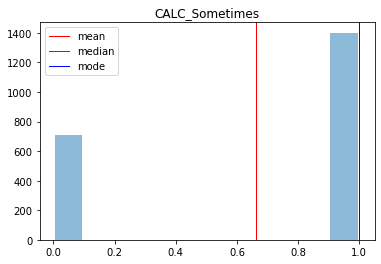

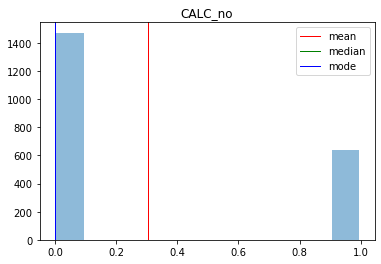

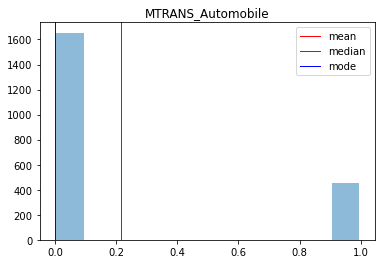

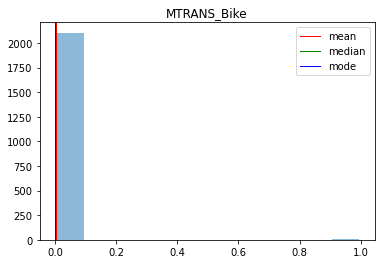

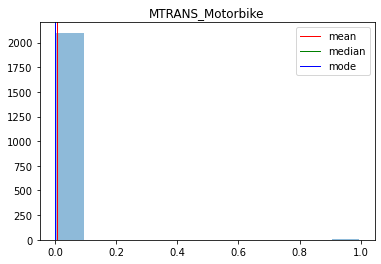

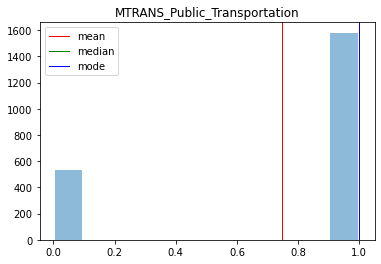

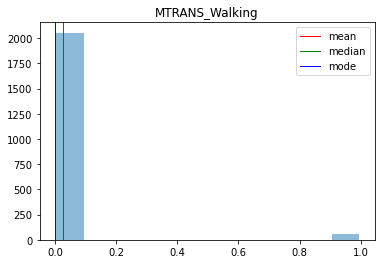

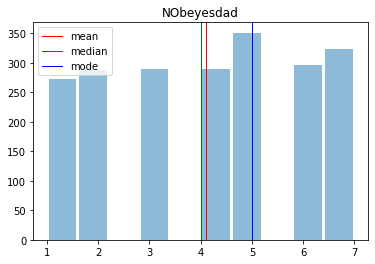

In [35]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('multipage.pdf') as pdf:  #生成一个pdf文件
    for i in range(0,27):
        plt.figure(i) 
        plt.axvline(x = np.mean(Obesity1[str(columns[i])]), linewidth = 1, color='r', label='mean')
        plt.axvline(x = np.median(Obesity1[str(columns[i])]), linewidth = 1, color='g', label='median')
        plt.axvline(x = mode(Obesity1[str(columns[i])])[0], linewidth=1, color='b', label='mode')
        plt.legend(loc = 'best')
        plt.hist(Obesity1[str(columns[i])], rwidth = 0.9, alpha = 0.5)
        plt.title(str(columns[i]))
        pdf.savefig()    #将图片储存到pdf文件中

* 生成的PDF文件中包含所有变量下数据的直方图，以及其平均数（红色线）、中位数（绿色线）、众数（蓝色线），可以直观地看到样本数据的分布情况和一般水平。
* 以Gender为例，可以看到样本中男女分布均匀
* 以Age为例，可以看到样本中年龄大多在30以下，另外一部分在30~60之间，即这个样本采集的大部分是年轻人的数据，也有部分中年人的数据

### 发散程度（最值、极差、方差、标准差、变异系数）

In [34]:
#计算最值
Max = []
for column in columns:
    Max.append(np.max(Obesity1[str(column)]))
    
Min = []
for column in columns:
    Min.append(np.min(Obesity1[str(column)]))
    
#计算极差
Ptp=[]
for column in columns:
    Ptp.append(np.ptp(Obesity1[str(column)]))

#计算方差
Var = []
for column in columns:
    Var.append(np.var(Obesity1[str(column)]))
    
#计算标准差
Std = []
for column in columns:
    Std.append(np.std(Obesity1[str(column)]))

#计算变异系数
CV = []
for column in columns:
    cv = np.mean(Obesity1[str(column)])/np.std(Obesity1[str(column)])
    CV.append(cv)

In [36]:
diverge = pd.DataFrame({'variables':columns,'max':Max,'min':Min,'ptp':Ptp, 'var':Var,'std':Std,'CV':CV})
diverge

,variables,max,min,ptp,var,std,CV
0,Gender,1.00,0.00,1.00,0.249965,0.499965,1.011914
1,Age,61.00,14.00,47.00,40.252236,6.344465,3.832096
2,Height,1.98,1.45,0.53,0.008702,0.093283,18.242150
3,Weight,173.00,39.00,134.00,685.652524,26.184968,3.306709
4,family_history_with_overweight,1.00,0.00,1.00,0.149116,0.386156,2.117337
5,FAVC,1.00,0.00,1.00,0.102589,0.320295,2.759769
6,FCVC,3.00,1.00,2.00,0.284943,0.533800,4.531740
7,NCP,4.00,1.00,3.00,0.605057,0.777854,3.452610
8,SMOKE,1.00,0.00,1.00,0.020409,0.142859,0.145900
9,CH2O,3.00,1.00,2.00,0.375534,0.612808,3.276737


* 可以看出CALC_Always的标准差太小，后续回归分析中可以考虑删除此变量

### 偏差程度：z-分数、偏度、峰度

In [37]:
#计算z-分数

def z(data,x):
    mean = np.mean(data)
    std = np.std(data)
    z = (x-mean)/std
    return z

dict_={}
for column in columns:
    Z = []
    for x in Obesity1[str(column)]:
        data = Obesity1[str(column)]
        Z.append(z(data,x))
    dict_[str(column)] = Z

z_score = pd.DataFrame(dict_)
z_score.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,-1.011914,-0.522124,-0.875589,-0.862558,0.472291,-2.759769,-0.785019,0.404153,-0.145900,-0.013073,...,-0.02177,-0.185194,-1.404720,1.517761,-0.525642,-0.05768,-0.072375,0.579721,-0.165078,-1.064334
1,-1.011914,-0.522124,-1.947599,-1.168077,0.472291,-2.759769,1.088342,0.404153,6.853997,1.618759,...,-0.02177,-0.185194,0.711885,-0.658865,-0.525642,-0.05768,-0.072375,0.579721,-0.165078,-1.064334
2,0.988227,-0.206889,1.054029,-0.366090,0.472291,-2.759769,-0.785019,0.404153,-0.145900,-0.013073,...,-0.02177,5.399735,-1.404720,-0.658865,-0.525642,-0.05768,-0.072375,0.579721,-0.165078,-1.064334
3,0.988227,0.423582,1.054029,0.015808,-2.117337,-2.759769,1.088342,0.404153,-0.145900,-0.013073,...,-0.02177,5.399735,-1.404720,-0.658865,-0.525642,-0.05768,-0.072375,-1.724969,6.057758,-0.560452
4,0.988227,-0.364507,0.839627,0.122740,-2.117337,-2.759769,-0.785019,-2.167023,-0.145900,-0.013073,...,-0.02177,-0.185194,0.711885,-0.658865,-0.525642,-0.05768,-0.072375,0.579721,-0.165078,-0.056570


In [38]:
#计算偏度
Skew = []
for column in columns:
    Skew.append(Obesity1[str(column)].skew())

#计算峰度
Kurt = []
for column in columns:
    Kurt.append(Obesity1[str(column)].kurt())
    
deviation = pd.DataFrame({'variables':columns,'skew':Skew,'kurt':Kurt})
deviation

,variables,skew,kurt
0,Gender,-0.023704,-2.001335
1,Age,1.529100,2.826389
2,Height,-0.012855,-0.562949
3,Weight,0.255410,-0.699898
4,family_history_with_overweight,-1.646216,0.710699
5,FAVC,-2.399125,3.759363
6,FCVC,-0.432906,-0.637546
7,NCP,-1.107097,0.385527
8,SMOKE,6.712867,43.103425
9,CH2O,-0.104912,-0.879395


* CALC_Always偏度和峰度过大，数据相对集中，后续回归分析可以考虑删除此变量

### 相关程度：相关系数、协方差

$Cov(X,Y) = E[XY] - EXEY$ 

$R(X,Y) = \frac{Cov(X,Y)}{\sqrt{Var(X)Var(Y)}}$

In [39]:
Obesity2 = np.array(Obesity1)

#计算协方差
##根据公式定义协方差函数
def coveriance(x,y):
    z = x*y
    return  np.mean(z)-np.mean(x)*np.mean(y)

##对所有列两两求协方差，并合并结果
dict_ = {}
for i in range(0,27):
    list_ = []
    for j in range(0,27):
        x = Obesity2[:,i].astype('float32')
        y = Obesity2[:,j].astype('float32')
        cov = coveriance(x,y)
        list_.append(cov) 
    dict_[str(i)] = list_
Cov_df = pd.DataFrame(dict_)
Cov_df.index = columns
Cov_df.columns = columns
Cov_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
Gender,0.249965,0.153507,2.884406e-02,2.116486,0.019791,0.010398,-0.073260,0.026289,0.003193,0.033068,...,2.340496e-04,0.003120,-0.008904,0.005550,0.028325,0.001638,0.001627,-0.034749,0.003159,-0.031219
Age,0.153507,40.252197,-1.536560e-02,33.651123,0.504019,0.129856,0.055180,-0.216866,0.083374,-0.176136,...,-1.569208e-03,0.093795,-0.037418,-0.054807,1.580010,0.001332,0.009266,-1.526312,-0.064297,3.562218
Height,0.028844,-0.015366,8.701324e-03,1.131256,0.008922,0.005329,-0.001898,0.017681,0.000740,0.012197,...,-7.945928e-07,0.000760,0.004719,-0.005478,0.002991,0.000155,-0.000070,-0.003630,0.000554,0.024727
Weight,2.116486,33.651123,1.131256e+00,685.653320,5.023590,2.283775,3.020920,2.188965,0.096311,3.218521,...,-1.022551e-02,-0.195875,3.211555,-3.005449,-0.146872,-0.032734,-0.070320,0.674103,-0.424177,47.458435
family_history_with_overweight,0.019791,0.504019,8.921862e-03,5.023590,0.149116,0.025731,0.008322,0.021437,0.000959,0.034889,...,8.639411e-05,-0.001532,-0.004495,0.005940,0.015797,-0.000343,-0.001418,-0.009873,-0.004162,0.387126
FAVC,0.010398,0.129856,5.329132e-03,2.283775,0.025731,0.102589,-0.004664,-0.001744,-0.002318,0.001908,...,5.497810e-05,-0.003257,0.021127,-0.017924,0.007598,-0.001510,-0.000816,0.003966,-0.009238,0.157511
FCVC,-0.073260,0.055180,-1.898289e-03,3.020920,0.008322,-0.004664,0.284944,0.017529,0.001092,0.022396,...,-1.985044e-04,-0.001783,0.020883,-0.018901,-0.013421,-0.000916,-0.000289,0.013426,0.001200,0.241282
NCP,0.026289,-0.216866,1.768064e-02,2.188965,0.021437,-0.001744,0.017529,0.605056,0.000868,0.027212,...,-7.984975e-04,-0.002664,0.036486,-0.033023,0.017115,0.001042,0.000217,-0.019187,0.000813,0.041203
SMOKE,0.003193,0.083374,7.396005e-04,0.096311,0.000959,-0.002318,0.001092,0.000868,0.020409,-0.002801,...,-9.873615e-06,0.002625,0.000852,-0.003467,0.000699,-0.000069,0.000365,-0.001389,0.000394,0.000976
CH2O,0.033068,-0.176136,1.219749e-02,3.218521,0.034889,0.001908,0.022396,0.027212,-0.002801,0.375534,...,-3.795023e-06,0.005425,0.018023,-0.023444,-0.011669,0.000921,-0.000042,0.009972,0.000818,0.161762


In [15]:
#计算相关系数
dict_2 = {}
for i in range(0,27):
    list_2 = []
    for j in range(0,27):
        x = Obesity2[:,i].astype('float32')
        y = Obesity2[:,j].astype('float32')
        cov = coveriance(x.astype('float32'),y.astype('float32'))
        r = cov/(np.var(x)*np.var(y))**0.5
        list_2.append(r) 
    dict_2[str(i)] = list_2
R_df = pd.DataFrame(dict_2)
R_df.index = columns
R_df.columns = columns
R_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
Gender,1.000000,0.048394,0.618466,0.161668,0.102512,0.064934,-0.274504,0.067600,0.044698,0.107930,...,0.021514,0.034848,-0.037694,0.024163,0.137560,0.057001,0.045203,-0.160184,0.039317,-0.031463
Age,0.048394,0.999999,-0.025963,0.202559,0.205726,0.063902,0.016293,-0.043944,0.091987,-0.045303,...,-0.011367,0.082566,-0.012483,-0.018803,0.604682,0.003652,0.020286,-0.554448,-0.063064,0.282914
Height,0.618466,-0.025963,0.999961,0.463135,0.247680,0.178363,-0.038123,0.243668,0.055499,0.213376,...,-0.000391,0.045518,0.107070,-0.127828,0.077850,0.028996,-0.010471,-0.089686,0.036951,0.133566
Weight,0.161668,0.202559,0.463135,1.000001,0.496821,0.272302,0.216127,0.107470,0.025746,0.200576,...,-0.017947,-0.041778,0.259599,-0.249828,-0.013619,-0.021745,-0.037300,0.059332,-0.100805,0.913251
family_history_with_overweight,0.102512,0.205726,0.247680,0.496821,1.000000,0.208036,0.040373,0.071369,0.017386,0.147437,...,0.010282,-0.022154,-0.024637,0.033482,0.099327,-0.015435,-0.051011,-0.058927,-0.067076,0.505148
FAVC,0.064934,0.063902,0.178363,0.272302,0.208036,1.000000,-0.027282,-0.007000,-0.050660,0.009720,...,0.007888,-0.056795,0.139611,-0.121809,0.057597,-0.082005,-0.035401,0.028539,-0.179473,0.247793
FCVC,-0.274504,0.016293,-0.038123,0.216127,0.040373,-0.027282,1.000003,0.042216,0.014320,0.068464,...,-0.017090,-0.018655,0.082805,-0.077072,-0.061049,-0.029843,-0.007512,0.057966,0.013991,0.227759
NCP,0.067600,-0.043944,0.243668,0.107470,0.071369,-0.007000,0.042216,0.999998,0.007811,0.057087,...,-0.047176,-0.019126,0.099280,-0.092407,0.053424,0.023312,0.003875,-0.056849,0.006502,0.026690
SMOKE,0.044698,0.091987,0.055499,0.025746,0.017386,-0.050660,0.014320,0.007811,1.000000,-0.031995,...,-0.003176,0.102614,0.012624,-0.052824,0.011873,-0.008416,0.035496,-0.022409,0.017184,0.003442
CH2O,0.107930,-0.045303,0.213376,0.200576,0.147437,0.009720,0.068464,0.057087,-0.031995,1.000000,...,-0.000285,0.049442,0.062251,-0.083272,-0.046237,0.026139,-0.000946,0.037504,0.008307,0.133009


* 可以看出自变量之间都没有强的相关性（强的相关性：相关系数>0.8）